# EECS3401 - Group Project - Group 2 #
    
## CO2 emission prediction ##

### frame ### 
supervised: as the target value(CO2) emmision is provided as label
        
model-based: regression model is used to make the prediction

batch-learning: as of now, we have no plan to make this model to be trained with future incomming new data

### 1. Dataset acquisition ###

In [1]:
%pip install pandas
%pip install requests


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import requests as rq
from io import StringIO

In [3]:
url = 'https://raw.githubusercontent.com/jewbe22/eecs3401-group2-groupProject/main/data/Fuel_Consumption_Ratings_2023.csv'
download = rq.get(url).content

co2_emission = pd.read_csv(StringIO(download.decode(errors='ignore')), sep=',', engine='python')
co2_emission

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,NaN,N = natural gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852,Fuel consumption,City and highway fuel consumption ratings are ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,CO2 emissions,the tailpipe emissions of carbon dioxide (in g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,CO2 rating,the tailpipe emissions of carbon dioxide rated...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. EDA ###

In [4]:
# todo

### 3. Data cleaning/Preprocessing ###

In [5]:
# todo

### 4. Model training ###

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score

RANDOM_STATE = 42

In [7]:
# todo

## mocking dataset, to be deleted.
column = []
for i in range(13):
    column.append("x_" + str(i))
column.append("target")

X_train = np.random.rand(1000,13)
X_test = np.random.rand(200, 13)
y_train = np.random.randint(low=1, high=100, size=(1000,1))
y_test = np.random.randint(low=1, high=100, size=(200,1))
## mocking ends




In [8]:
linear_model = LinearRegression()
linear_params = {
    'copy_X':[True],
    'n_jobs':[None, 1, 2, 5, 10],
    'positive':[True, False]
}

In [9]:
tree_model = DecisionTreeRegressor()
tree_params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best','random'],
    'random_state':[RANDOM_STATE]    
}

In [10]:
elastic_model = ElasticNet()
elastic_params = {
    'alpha':[0.5, 1, 1.5],
    'l1_ratio':[0.3, 0.4, 0.5, 0.6, 0.7],
    'max_iter':[2000, 4000, 8000],
    'copy_X':[True],
    'positive':[True, False],
    'random_state':[RANDOM_STATE]
}

In [11]:

scoring_methods = ['neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error', 'r2']

linear_best = GridSearchCV(linear_model, linear_params, scoring=scoring_methods, refit='neg_root_mean_squared_error', cv=5)
tree_best = GridSearchCV(tree_model, tree_params, scoring=scoring_methods, refit='neg_root_mean_squared_error', cv=5)
elastic_best = GridSearchCV(elastic_model, elastic_params, scoring=scoring_methods, refit='neg_root_mean_squared_error', cv=5)
models = [linear_best, tree_best, elastic_best]
model_names = ['Linear regression', 'Decision tree regressor', 'Elastic net']
cv_result = {}
for model, name in zip(models, model_names):
    #print(f'{name}========================================================')
    model.fit(X_train, y_train)
    cv_result[name] = pd.DataFrame(cross_validate(model.best_estimator_, X_train, y_train, scoring=scoring_methods ,cv=5))
    #print(cv_result)




In [12]:
stat_columns = cv_result[model_names[0]].mean().index
statistic = pd.DataFrame(columns=stat_columns)

for model in model_names:
    statistic.loc[-1] = cv_result[model].mean()
    statistic.index = statistic.index + 1
    #statistic = statistic.sort_index()


statistic.index = model_names




In [15]:
statistic.sort_values(by='test_neg_root_mean_squared_error', inplace=True, ascending=False)
statistic

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_r2
Elastic net,0.001595,0.002588,-25.482614,-851.745261,-29.180251,-0.000729
Linear regression,0.001403,0.001402,-25.717794,-871.600035,-29.520032,-0.024347
Decision tree regressor,0.026851,0.003413,-32.641000,-1625.973000,-40.313662,-0.911571


### 5. Performance analysis ###

In [16]:
#source : https://www.dataquest.io/blog/learning-curves-machine-learning/
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [17]:
train_size = np.arange(start=100, stop=int(X_train.shape[0] * 0.8), step=200)

In [18]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=linear_best,X=X_train, y=y_train, train_sizes=train_size, cv=5, scoring='neg_mean_absolute_error') 

In [19]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

(0.0, 40.0)

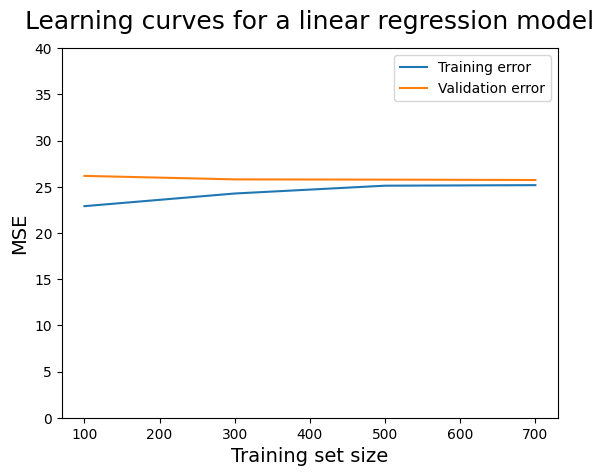

In [20]:
#plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)